# Model creation notebook
This notebook serves as a surface-level explanation of how a model is created through our `maintenance_prediction` package. 
First, the package and it’s modules. The modules are split into 5;
* Dataset, which imports the dataset
* Preprocess, which preprocesses the dataset (handles invalid data and reshapes it for use in other modules)
* Train, which trains a model with the dataset
* Evaluate, which calculates and displays the metrics of the trained model
* Visualisation, which visualises the model and metrics

## Importing
First, the package and underlying modules are imported.

In [1]:
from src.maintenance_predictions import dataset, preprocess, train, evaluate, visualisation

## Dataset module
Next, the dataset itself is imported. The data is stored in `src/maintenance_predictions/data`. If no path is given into the `load_dataset()` function, this file location is used.

In [2]:
print("[!] Loading dataset...")
dataset = dataset.load_dataset()

[!] Loading dataset...


## Preprocessing module
Now, the data is preprocessed. This adds label encoding, scales the data, and seperates the data into test- and train groups. This happends when `preprocess_data()` is called.

The preprocess_data function needs the earlier importer dataset, along with which target-variables need to be predicted, along with a list with the variables used to try and predict this target-variable. Each target-variable will get its own model when in the training module.

The function can also receive variables used in training the models. These variables are optional. The variables are:
* test_size, which determines in percentage, how the train and test data groups should be split. A test_size of 0.2 means the dataset will be split into 20% for the test set, and 80% for the train set. Default: 0.2.
* history_window, which determines how many past x-variables (non-target variables) are used in predicting an y-variable (target-variable) value. Default: 10.
* future_window, how many minutes into the future the model should predict. Default: 30.
* shift, how many x-values should be skipped between prediciting each y-value. Default:  1.
* random_state, a seed number to make all random-functions, non-random. Default: 1.
If none of the above training variables are specified, the default values are used.

In [3]:
print("\n[!] Preprocessing dataset...")
preprocessed_data = preprocess.preprocess_data(
    dataset,
    {
        # Used correlation of <= -0.5 or >= 0.5
        "Cooler condition": ["Time", "CE", "EPS1", "FS2", "PS5", "TS1", "VS1"],
        # Used correlation of <= -0.05 or >= 0.05
        "Valve condition": ["Time", "FS1", "PS3", "PS4", "SE", "VS1"],
        # Used correlation of <= -0.25 or >= 0.25
        "Internal pump leakage": ["Time", "FS1", "PS3", "SE", "VS1"],
        # Used correlation of <= -0.20 or >= 0.20
        "Hydraulic accumulator": ["Time", "CE", "CP", "PS5", "TS2"],
        # Might be added in the future.
        # "Stable flag": []
    },
    test_size=0.2,
    history_window=15,
    future_window=30,
    shift=1,
    random_state=0
)


[!] Preprocessing dataset...


## Training module
For each target variable specified in the preprocessing stage, a model is trained using `train.train_multiple_model()`. This function takes three arguments:
* The preprocessed data (required).
* Epochs (optional). Epochs are a measurement of how many 'steps' a model should be trained for. Default: 100.
* Early_stopping_patience (optional). The amount of epochs a model is allowed to not improve before training is stopped. Default: 10.
If the optional arguments aren't given, the default is used.


In [4]:
print("\n[!] Training models...")
models = train.train_multiple_model(
    preprocessed_data,
    epochs=250,
    early_stopping_patience=25
)


[!] Training models...
Epoch 1/250
54/54 [==============================] - 5s 31ms/step - loss: 0.0381 - mean_absolute_error: 0.1196 - val_loss: 0.0109 - val_mean_absolute_error: 0.0662
Epoch 2/250
54/54 [==============================] - 1s 18ms/step - loss: 0.0081 - mean_absolute_error: 0.0543 - val_loss: 0.0060 - val_mean_absolute_error: 0.0431
Epoch 3/250
54/54 [==============================] - 1s 18ms/step - loss: 0.0060 - mean_absolute_error: 0.0459 - val_loss: 0.0053 - val_mean_absolute_error: 0.0389
Epoch 4/250
54/54 [==============================] - 1s 18ms/step - loss: 0.0058 - mean_absolute_error: 0.0434 - val_loss: 0.0052 - val_mean_absolute_error: 0.0407
Epoch 5/250
54/54 [==============================] - 1s 18ms/step - loss: 0.0052 - mean_absolute_error: 0.0403 - val_loss: 0.0042 - val_mean_absolute_error: 0.0323
Epoch 6/250
54/54 [==============================] - 1s 18ms/step - loss: 0.0046 - mean_absolute_error: 0.0356 - val_loss: 0.0034 - val_mean_absolute_error:

54/54 [==============================] - 1s 20ms/step - loss: 0.0028 - mean_absolute_error: 0.0218 - val_loss: 0.0014 - val_mean_absolute_error: 0.0209
Epoch 51/250
54/54 [==============================] - 1s 19ms/step - loss: 0.0020 - mean_absolute_error: 0.0178 - val_loss: 0.0012 - val_mean_absolute_error: 0.0090
Epoch 52/250
54/54 [==============================] - 1s 19ms/step - loss: 0.0017 - mean_absolute_error: 0.0157 - val_loss: 6.9933e-04 - val_mean_absolute_error: 0.0067
Epoch 53/250
54/54 [==============================] - 1s 19ms/step - loss: 0.0012 - mean_absolute_error: 0.0123 - val_loss: 0.0050 - val_mean_absolute_error: 0.0248
Epoch 54/250
54/54 [==============================] - 1s 19ms/step - loss: 0.0016 - mean_absolute_error: 0.0154 - val_loss: 0.0012 - val_mean_absolute_error: 0.0188
Epoch 55/250
54/54 [==============================] - 1s 19ms/step - loss: 0.0024 - mean_absolute_error: 0.0183 - val_loss: 0.0049 - val_mean_absolute_error: 0.0379
Epoch 56/250
54/54 

Epoch 23/250
54/54 [==============================] - 1s 20ms/step - loss: 0.1286 - mean_absolute_error: 0.2967 - val_loss: 0.1248 - val_mean_absolute_error: 0.3033
Epoch 24/250
54/54 [==============================] - 1s 20ms/step - loss: 0.1352 - mean_absolute_error: 0.3110 - val_loss: 0.1364 - val_mean_absolute_error: 0.3128
Epoch 25/250
54/54 [==============================] - 1s 20ms/step - loss: 0.1300 - mean_absolute_error: 0.3005 - val_loss: 0.1289 - val_mean_absolute_error: 0.2838
Epoch 26/250
54/54 [==============================] - 1s 20ms/step - loss: 0.1271 - mean_absolute_error: 0.2972 - val_loss: 0.1502 - val_mean_absolute_error: 0.3180
Epoch 27/250
54/54 [==============================] - 1s 20ms/step - loss: 0.1289 - mean_absolute_error: 0.2968 - val_loss: 0.1212 - val_mean_absolute_error: 0.2885
Epoch 28/250
54/54 [==============================] - 1s 20ms/step - loss: 0.1238 - mean_absolute_error: 0.2892 - val_loss: 0.1221 - val_mean_absolute_error: 0.2866
Epoch 29/2

Epoch 73/250
54/54 [==============================] - 1s 20ms/step - loss: 0.1114 - mean_absolute_error: 0.2663 - val_loss: 0.1158 - val_mean_absolute_error: 0.2789
Epoch 74/250
54/54 [==============================] - 1s 20ms/step - loss: 0.1139 - mean_absolute_error: 0.2706 - val_loss: 0.1203 - val_mean_absolute_error: 0.2885
Epoch 75/250
54/54 [==============================] - 1s 20ms/step - loss: 0.1126 - mean_absolute_error: 0.2666 - val_loss: 0.1169 - val_mean_absolute_error: 0.2818
Epoch 76/250
54/54 [==============================] - 1s 20ms/step - loss: 0.1118 - mean_absolute_error: 0.2652 - val_loss: 0.1158 - val_mean_absolute_error: 0.2604
Epoch 77/250
54/54 [==============================] - 1s 20ms/step - loss: 0.1120 - mean_absolute_error: 0.2682 - val_loss: 0.1119 - val_mean_absolute_error: 0.2618
Epoch 78/250
54/54 [==============================] - 1s 20ms/step - loss: 0.1080 - mean_absolute_error: 0.2573 - val_loss: 0.1156 - val_mean_absolute_error: 0.2658
Epoch 79/2

54/54 [==============================] - 1s 21ms/step - loss: 0.0822 - mean_absolute_error: 0.2104 - val_loss: 0.0973 - val_mean_absolute_error: 0.2533
Epoch 123/250
54/54 [==============================] - 1s 21ms/step - loss: 0.0829 - mean_absolute_error: 0.2164 - val_loss: 0.1039 - val_mean_absolute_error: 0.2470
Epoch 124/250
54/54 [==============================] - 1s 21ms/step - loss: 0.0799 - mean_absolute_error: 0.2068 - val_loss: 0.1017 - val_mean_absolute_error: 0.2366
Epoch 125/250
54/54 [==============================] - 1s 20ms/step - loss: 0.0842 - mean_absolute_error: 0.2133 - val_loss: 0.1004 - val_mean_absolute_error: 0.2532
Epoch 126/250
54/54 [==============================] - 1s 20ms/step - loss: 0.0767 - mean_absolute_error: 0.2017 - val_loss: 0.0880 - val_mean_absolute_error: 0.2179
Epoch 127/250
54/54 [==============================] - 1s 20ms/step - loss: 0.0772 - mean_absolute_error: 0.2054 - val_loss: 0.0901 - val_mean_absolute_error: 0.2262
Epoch 128/250
54/5

54/54 [==============================] - 1s 19ms/step - loss: 0.0522 - mean_absolute_error: 0.1531 - val_loss: 0.0682 - val_mean_absolute_error: 0.1753
Epoch 172/250
54/54 [==============================] - 1s 19ms/step - loss: 0.0474 - mean_absolute_error: 0.1438 - val_loss: 0.0663 - val_mean_absolute_error: 0.1684
Epoch 173/250
54/54 [==============================] - 1s 19ms/step - loss: 0.0530 - mean_absolute_error: 0.1500 - val_loss: 0.0876 - val_mean_absolute_error: 0.2040
Epoch 174/250
54/54 [==============================] - 1s 19ms/step - loss: 0.0519 - mean_absolute_error: 0.1541 - val_loss: 0.0601 - val_mean_absolute_error: 0.1681
Epoch 175/250
54/54 [==============================] - 1s 19ms/step - loss: 0.0486 - mean_absolute_error: 0.1463 - val_loss: 0.0659 - val_mean_absolute_error: 0.1702
Epoch 176/250
54/54 [==============================] - 1s 20ms/step - loss: 0.0476 - mean_absolute_error: 0.1460 - val_loss: 0.0643 - val_mean_absolute_error: 0.1681
Epoch 177/250
54/5

54/54 [==============================] - 1s 21ms/step - loss: 0.0364 - mean_absolute_error: 0.1195 - val_loss: 0.0441 - val_mean_absolute_error: 0.1307
Epoch 221/250
54/54 [==============================] - 1s 19ms/step - loss: 0.0246 - mean_absolute_error: 0.0969 - val_loss: 0.0386 - val_mean_absolute_error: 0.1160
Epoch 222/250
54/54 [==============================] - 1s 19ms/step - loss: 0.0353 - mean_absolute_error: 0.1137 - val_loss: 0.0461 - val_mean_absolute_error: 0.1376
Epoch 223/250
54/54 [==============================] - 1s 19ms/step - loss: 0.0321 - mean_absolute_error: 0.1092 - val_loss: 0.0584 - val_mean_absolute_error: 0.1525
Epoch 224/250
54/54 [==============================] - 1s 20ms/step - loss: 0.0311 - mean_absolute_error: 0.1123 - val_loss: 0.0459 - val_mean_absolute_error: 0.1347
Epoch 225/250
54/54 [==============================] - 1s 19ms/step - loss: 0.0259 - mean_absolute_error: 0.0982 - val_loss: 0.0373 - val_mean_absolute_error: 0.1180
Epoch 226/250
54/5

54/54 [==============================] - 1s 19ms/step - loss: 0.1306 - mean_absolute_error: 0.3039 - val_loss: 0.1428 - val_mean_absolute_error: 0.3074
Epoch 20/250
54/54 [==============================] - 1s 19ms/step - loss: 0.1346 - mean_absolute_error: 0.3101 - val_loss: 0.1407 - val_mean_absolute_error: 0.3258
Epoch 21/250
54/54 [==============================] - 1s 19ms/step - loss: 0.1333 - mean_absolute_error: 0.3061 - val_loss: 0.1404 - val_mean_absolute_error: 0.3075
Epoch 22/250
54/54 [==============================] - 1s 19ms/step - loss: 0.1258 - mean_absolute_error: 0.2963 - val_loss: 0.1368 - val_mean_absolute_error: 0.3072
Epoch 23/250
54/54 [==============================] - 1s 19ms/step - loss: 0.1242 - mean_absolute_error: 0.2906 - val_loss: 0.1482 - val_mean_absolute_error: 0.3165
Epoch 24/250
54/54 [==============================] - 1s 19ms/step - loss: 0.1234 - mean_absolute_error: 0.2896 - val_loss: 0.1259 - val_mean_absolute_error: 0.3000
Epoch 25/250
54/54 [===

Epoch 69/250
54/54 [==============================] - 1s 20ms/step - loss: 0.0754 - mean_absolute_error: 0.2078 - val_loss: 0.0785 - val_mean_absolute_error: 0.2022
Epoch 70/250
54/54 [==============================] - 1s 20ms/step - loss: 0.0772 - mean_absolute_error: 0.2018 - val_loss: 0.0813 - val_mean_absolute_error: 0.2151
Epoch 71/250
54/54 [==============================] - 1s 20ms/step - loss: 0.0690 - mean_absolute_error: 0.1865 - val_loss: 0.0843 - val_mean_absolute_error: 0.2090
Epoch 72/250
54/54 [==============================] - 1s 20ms/step - loss: 0.0701 - mean_absolute_error: 0.1872 - val_loss: 0.0748 - val_mean_absolute_error: 0.1979
Epoch 73/250
54/54 [==============================] - 1s 20ms/step - loss: 0.0703 - mean_absolute_error: 0.1875 - val_loss: 0.0826 - val_mean_absolute_error: 0.2239
Epoch 74/250
54/54 [==============================] - 1s 20ms/step - loss: 0.0838 - mean_absolute_error: 0.2134 - val_loss: 0.0794 - val_mean_absolute_error: 0.2123
Epoch 75/2

54/54 [==============================] - 1s 20ms/step - loss: 0.0548 - mean_absolute_error: 0.1439 - val_loss: 0.0989 - val_mean_absolute_error: 0.1977
Epoch 119/250
54/54 [==============================] - 1s 22ms/step - loss: 0.0545 - mean_absolute_error: 0.1399 - val_loss: 0.0488 - val_mean_absolute_error: 0.1417
Epoch 120/250
54/54 [==============================] - 1s 21ms/step - loss: 0.0491 - mean_absolute_error: 0.1315 - val_loss: 0.0575 - val_mean_absolute_error: 0.1482
Epoch 121/250
54/54 [==============================] - 1s 21ms/step - loss: 0.0560 - mean_absolute_error: 0.1467 - val_loss: 0.0444 - val_mean_absolute_error: 0.1289
Epoch 122/250
54/54 [==============================] - 1s 21ms/step - loss: 0.0478 - mean_absolute_error: 0.1260 - val_loss: 0.0475 - val_mean_absolute_error: 0.1279
Epoch 123/250
54/54 [==============================] - 1s 21ms/step - loss: 0.0388 - mean_absolute_error: 0.1091 - val_loss: 0.0598 - val_mean_absolute_error: 0.1391
Epoch 124/250
54/5

Epoch 38/250
54/54 [==============================] - 1s 20ms/step - loss: 0.0164 - mean_absolute_error: 0.0759 - val_loss: 0.0307 - val_mean_absolute_error: 0.0916
Epoch 39/250
54/54 [==============================] - 1s 20ms/step - loss: 0.0194 - mean_absolute_error: 0.0850 - val_loss: 0.0300 - val_mean_absolute_error: 0.0902
Epoch 40/250
54/54 [==============================] - 1s 20ms/step - loss: 0.0196 - mean_absolute_error: 0.0796 - val_loss: 0.0300 - val_mean_absolute_error: 0.0834
Epoch 41/250
54/54 [==============================] - 1s 20ms/step - loss: 0.0195 - mean_absolute_error: 0.0835 - val_loss: 0.0346 - val_mean_absolute_error: 0.0970
Epoch 42/250
54/54 [==============================] - 1s 19ms/step - loss: 0.0214 - mean_absolute_error: 0.0873 - val_loss: 0.0202 - val_mean_absolute_error: 0.0799
Epoch 43/250
54/54 [==============================] - 1s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.0760 - val_loss: 0.0407 - val_mean_absolute_error: 0.1176
Epoch 44/2

## Evaluation and visualisation module
The evaluation module calculates four metric values:
* Precision: in what capacity can the model prevent predicting false negatives. Provides a value between 1 (the best) and 0 (the worst).
* Recall: in what capacity can the model prevent predicting false positives. Provides a value between 1 (the best) and 0 (the worst).
* Accuracy: In percentages, how many of the predicted values exactly match the real values. Provides a value between 1 (the besT) and 0 (the worst).
* F1_score: The harmonic average between recall and accuracy. Provides a value between 1 (the best) and 0 (the worst).

The visualisation module generates a confusion matrix and saves it in the `models/name-of-target-variable` folder.


[!] Evaluating models...

cooler condition
Precision: [0.99354839 0.96078431 1.        ]
Recall: [1.         0.99324324 0.95419847]
Accuracy: 0.9838337182448037
F1-score: [0.99676375 0.97674419 0.9765625 ]



C:\Users\JEAN-P~1\AppData\Local\Temp/ipykernel_19092/1182470912.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  confusion_matrix.show()



[!] Do you want to save this model? (Y/N) n

valve condition


C:\Users\JEAN-P~1\AppData\Local\Temp/ipykernel_19092/1182470912.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  confusion_matrix.show()


Precision: [0.77272727 0.57608696 0.62       0.95428571]
Recall: [0.65384615 0.70666667 0.80519481 0.8226601 ]
Accuracy: 0.76905311778291
F1-score: [0.70833333 0.63473054 0.70056497 0.88359788]


[!] Do you want to save this model? (Y/N) n

internal pump leakage
Precision: [0.86666667 0.65354331 0.87654321]
Recall: [0.82627119 0.8556701  0.71      ]
Accuracy: 0.8060046189376443
F1-score: [0.84598698 0.74107143 0.78453039]



C:\Users\JEAN-P~1\AppData\Local\Temp/ipykernel_19092/1182470912.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  confusion_matrix.show()



[!] Do you want to save this model? (Y/N) n

hydraulic accumulator


C:\Users\JEAN-P~1\AppData\Local\Temp/ipykernel_19092/1182470912.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  confusion_matrix.show()


Precision: [0.91275168 0.65263158 0.75862069 0.98039216]
Recall: [0.87741935 0.82666667 0.72527473 0.89285714]
Accuracy: 0.8406466512702079
F1-score: [0.89473684 0.72941176 0.74157303 0.93457944]


[!] Do you want to save this model? (Y/N) n


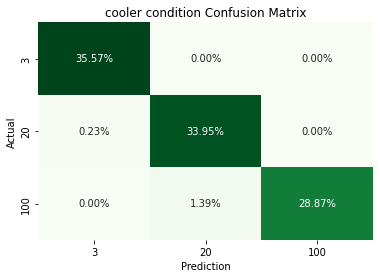

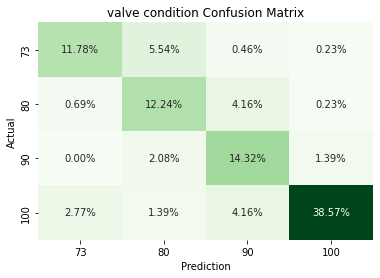

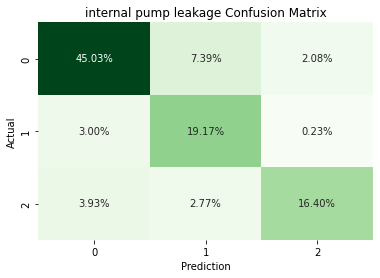

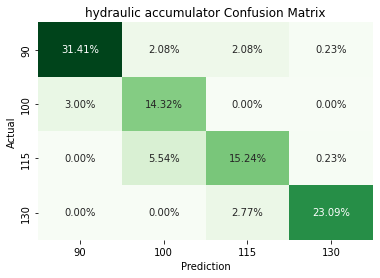

In [5]:
print("\n[!] Evaluating models...")
for name, model in models.items():
    print("\n", name, "\n", "=" * 50, sep="")

    precision, recall, accuracy, f1_score = evaluate.evaluate_model(
        model,
        preprocessed_data[name].model_data.x_validation,
        preprocessed_data[name].model_data.y_validation
    )

    print(
        f"Precision: {precision}\n",
        f"Recall: {recall}\n",
        f"Accuracy: {accuracy}\n",
        f"F1-score: {f1_score}\n",
        sep=""
    )

    confusion_matrix = visualisation.confusion_matrix(
        model,
        preprocessed_data[name].model_data.x_validation,
        preprocessed_data[name].model_data.y_validation,
        name + " Confusion Matrix"
    )
    confusion_matrix.show()

    save_model = None
    while save_model is None:
        save_input = input("\n[!] Do you want to save this model? (Y/N) ").casefold()
        if save_input == "y".casefold():
            save_model = True
        elif save_input == "n".casefold():
            save_model = False

    if save_model:
        print(f"   [!] Saving {name} model...")

        model.save(name, "../models")
        confusion_matrix.savefig("../models/" + name.replace(" ", "_").lower() + "/confusion_matrix")